# ANOVA 검정
1. 목적: 더채움 플러스 플랫폼 B2B, B2C 시장이 원시시장에 비해 경제적 성과와 시장 전체 효율성에 통계적으로 유의미한 효과를 가져오는가 ?
2. 귀무가설: 세 가지 시나리오 그룹간의 '포워더 평균 순수익'에는 통계적으로 유의미한 차이가 없다.
3. 귀무가설: 그룹 간의 '시장 총 공차율'에는 통계적으로 유의미한 차이가 없다.
4. 귀무가설: 그룹 간의 '평균 운송 비용'에는 통계적으로 유의미한 차이가 없다.

## 첫번째 귀무가설: 포워더 평균 순수익에는 통계적으로 유의미한 차이가 없다.

--- [1단계] 분석 시작: 데이터 로딩 ---
✅ 'final10_real.pkl' 파일을 성공적으로 불러왔습니다. (총 10800개 시뮬레이션 결과)

--- [2단계] 시각화를 통한 데이터 탐색 (Box Plot) ---


/var/folders/c6/rd6591yn02qbr593bfycd0qc0000gn/T/ipykernel_23429/3503778692.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='시나리오', y='포워더 평균 순이익', data=df, palette='viridis')


✅ 박스 플롯을 'boxplot_profit_by_scenario.png' 파일로 저장했습니다.


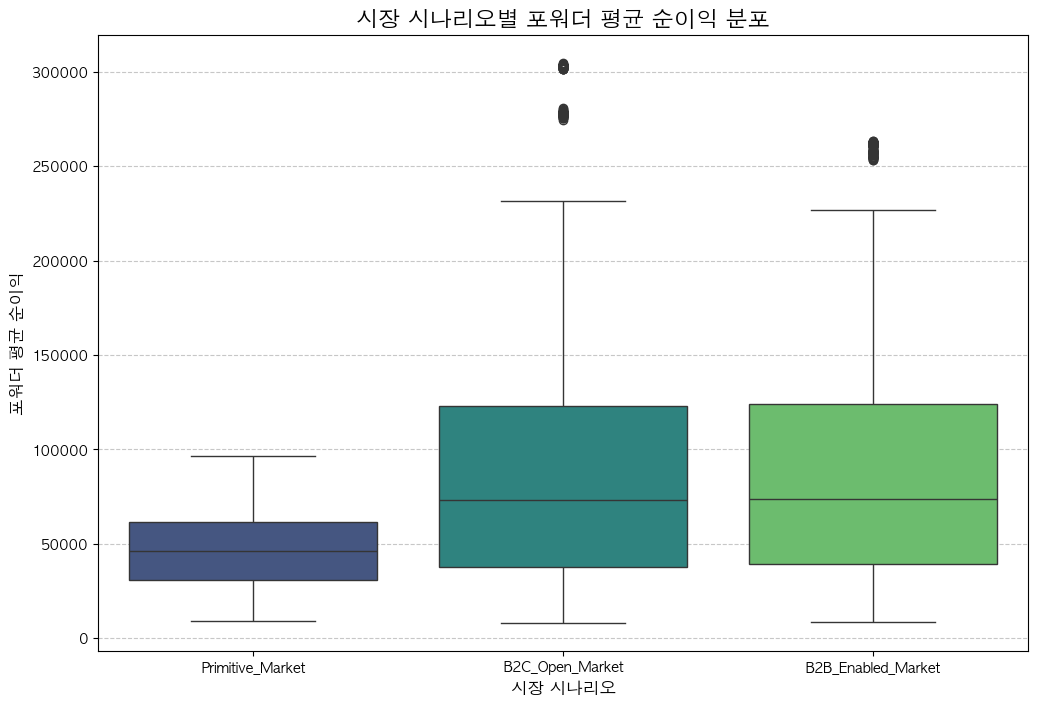


--- [3단계] ANOVA 가설 검정 실행 ---
  - 귀무가설(H₀): 세 시장 시나리오 그룹 간의 '포워더 평균 순이익'에는 차이가 없다.
  - 대립가설(H₁): 각각의 시장 시나리오 그룹은 다른 그룹과 평균 순이익이 다르다.

[ANOVA 검정 결과표]
                          sum_sq          df         F  PR(>F)
C(scenario)  4447536923460.87793     2.00000 825.81114 0.00000
Residual    29074478190458.44141 10797.00000       NaN     NaN
✅ ANOVA 결과표를 'anova_results_profit.xlsx' 파일로 저장했습니다.

--- [4단계] 사후 분석 (Tukey's HSD) ---
  - '어떤 그룹끼리' 차이가 나는지 구체적으로 분석합니다.


/var/folders/c6/rd6591yn02qbr593bfycd0qc0000gn/T/ipykernel_23429/3503778692.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]



[Tukey's HSD 다중 비교 결과표]
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
      group1            group2        meandiff  p-adj     lower       upper    reject
-------------------------------------------------------------------------------------
B2B_Enabled_Market  B2C_Open_Market   1239.9015 0.5682  -1627.1158   4106.9188  False
B2B_Enabled_Market Primitive_Market -42414.7721    0.0 -45281.7893 -39547.7548   True
   B2C_Open_Market Primitive_Market -43654.6736    0.0 -46521.6909 -40787.6563   True
-------------------------------------------------------------------------------------
✅ Tukey's HSD 결과표를 'tukey_hsd_results_profit.xlsx' 파일로 저장했습니다.

--- 분석 종료 ---


In [5]:
# =================================================================================
# [주 목적 1] 시장 시나리오가 포워더 순이익에 미치는 영향 분석 (ANOVA)
# (결과를 '표' 형태로 출력하고, 모든 산출물을 파일로 저장하는 최종 버전)
# =================================================================================

# --- [1단계] 라이브러리 임포트 및 데이터 로딩 ---
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("--- [1단계] 분석 시작: 데이터 로딩 ---")
pickle_filename = 'final10_real.pkl'
try:
    with open(pickle_filename, 'rb') as file:
        df = pickle.load(file)
    print(f"✅ '{pickle_filename}' 파일을 성공적으로 불러왔습니다. (총 {len(df)}개 시뮬레이션 결과)")
except FileNotFoundError:
    print(f"❌ 오류: '{pickle_filename}' 파일을 찾을 수 없습니다.")
    exit()

# --- 한글 폰트 설정 ---
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


# --- [2단계] 데이터 탐색 및 시각화 (EDA) ---
print("\n--- [2단계] 시각화를 통한 데이터 탐색 (Box Plot) ---")
plt.figure(figsize=(12, 8))
sns.boxplot(x='시나리오', y='포워더 평균 순이익', data=df, palette='viridis')
plt.title('시장 시나리오별 포워더 평균 순이익 분포', fontsize=16)
plt.xlabel('시장 시나리오', fontsize=12)
plt.ylabel('포워더 평균 순이익', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# --- [추가 기능 3] 박스 플롯을 PNG 파일로 저장 ---
boxplot_filename = 'boxplot_profit_by_scenario.png'
plt.savefig(boxplot_filename, dpi=300, bbox_inches='tight')
print(f"✅ 박스 플롯을 '{boxplot_filename}' 파일로 저장했습니다.")

plt.show()


# --- [3단계] ANOVA 가설 검정 (표 형태로 출력) ---
print("\n--- [3단계] ANOVA 가설 검정 실행 ---")
print("  - 귀무가설(H₀): 세 시장 시나리오 그룹 간의 '포워더 평균 순이익'에는 차이가 없다.")
print("  - 대립가설(H₁): 각각의 시장 시나리오 그룹은 다른 그룹과 평균 순이익이 다르다.")

df.rename(columns={'포워더 평균 순이익': 'profit', '시나리오': 'scenario'}, inplace=True)
model = ols('profit ~ C(scenario)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
pd.options.display.float_format = '{:.5f}'.format
print("\n[ANOVA 검정 결과표]")
print(anova_table)

# --- [추가 기능 1] ANOVA 결과표를 엑셀 파일로 저장 ---
excel_filename_anova = 'anova_results_profit.xlsx'
anova_table.to_excel(excel_filename_anova)
print(f"✅ ANOVA 결과표를 '{excel_filename_anova}' 파일로 저장했습니다.")

# p-값을 추출하여 다음 단계에서 사용합니다.
p_value = anova_table['PR(>F)'][0]

# --- [4단계] 사후 분석 (Post-hoc Analysis) ---
if p_value < 0.05:
    print("\n--- [4단계] 사후 분석 (Tukey's HSD) ---")
    print("  - '어떤 그룹끼리' 차이가 나는지 구체적으로 분석합니다.")
    
    tukey_result = pairwise_tukeyhsd(endog=df['profit'], groups=df['scenario'], alpha=0.05)
    
    print("\n[Tukey's HSD 다중 비교 결과표]")
    print(tukey_result)

    # --- [추가 기능 2] Tukey's HSD 결과표를 엑셀 파일로 저장 ---
    # Tukey 결과 객체를 pandas DataFrame으로 변환합니다.
    df_tukey = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
    excel_filename_tukey = 'tukey_hsd_results_profit.xlsx'
    df_tukey.to_excel(excel_filename_tukey, index=False)
    print(f"✅ Tukey's HSD 결과표를 '{excel_filename_tukey}' 파일로 저장했습니다.")

print("\n--- 분석 종료 ---")

## 두번째 귀무가설: 시장 총 공차율에 미치는 영향 분석
귀무가설: 그룹 간의 '시장 총 공차율'에는 통계적으로 유의미한 차이가 없다.

/var/folders/c6/rd6591yn02qbr593bfycd0qc0000gn/T/ipykernel_23429/2230812757.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='시나리오', y='시장 총 공차율', data=df, palette='plasma')


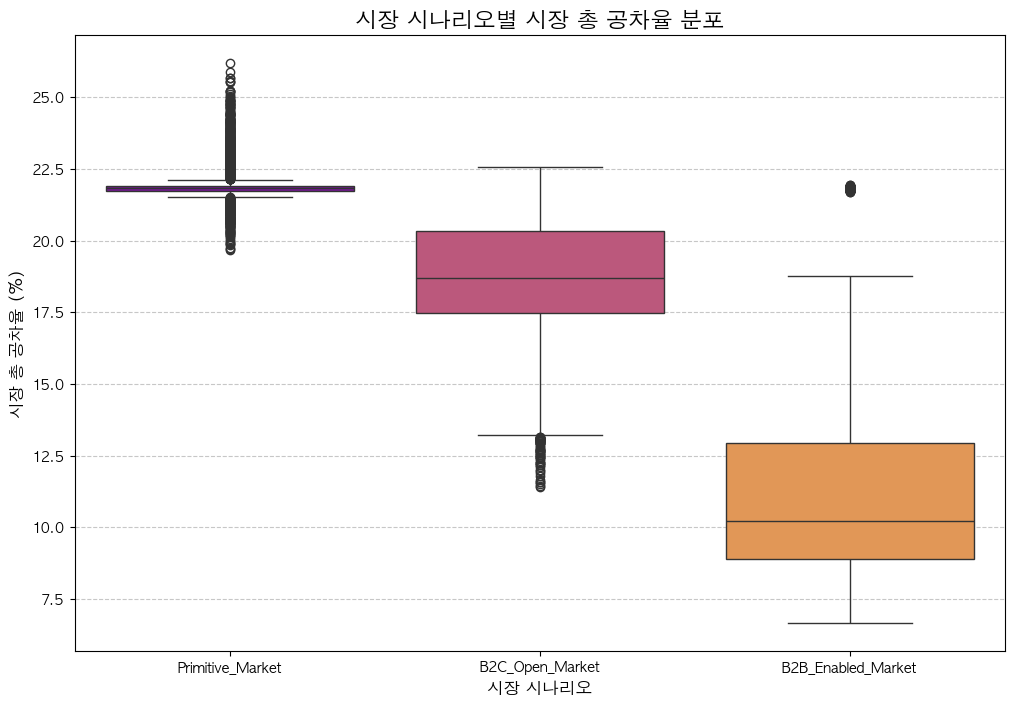

/var/folders/c6/rd6591yn02qbr593bfycd0qc0000gn/T/ipykernel_23429/2230812757.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]



[ANOVA 검정 결과표]
                  sum_sq          df           F  PR(>F)
C(scenario) 213051.62001     2.00000 19111.32294 0.00000
Residual     60182.08022 10797.00000         NaN     NaN

[Tukey's HSD 다중 비교 결과표]
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1            group2      meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------------
B2B_Enabled_Market  B2C_Open_Market   7.3552   0.0  7.2248  7.4856   True
B2B_Enabled_Market Primitive_Market    10.62   0.0 10.4896 10.7505   True
   B2C_Open_Market Primitive_Market   3.2648   0.0  3.1344  3.3953   True
-------------------------------------------------------------------------


In [9]:
# =================================================================================
# [주 목적 2] 시장 시나리오가 시장 총 공차율에 미치는 영향 분석 (ANOVA)
# 상세 주석 포함 버전
# =================================================================================

# --- [1단계] 라이브러리 임포트 및 데이터 로딩 ---
# 데이터 분석, 통계 검정, 시각화에 필요한 핵심 라이브러리들을 불러옵니다.
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import platform
# ANOVA 분석 및 사후 분석을 위해 statsmodels 라이브러리의 특정 기능들을 임포트합니다.
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 분석할 피클 파일의 이름을 변수에 저장합니다.
pickle_filename = 'final10_real.pkl'
try:
    # pickle 파일을 바이너리 읽기 모드('rb')로 열어서, 안의 데이터를 df 변수에 로드합니다.
    with open(pickle_filename, 'rb') as file:
        df = pickle.load(file)
except FileNotFoundError:
    # 만약 파일이 없을 경우, 오류 메시지를 출력하고 프로그램을 종료합니다.
    exit()

# --- 한글 폰트 설정 (그래프 깨짐 방지) ---
# 사용자의 운영체제를 확인하여, 그에 맞는 한글 폰트를 자동으로 설정합니다.
if platform.system() == 'Darwin': # Mac OS
    plt.rc('font', family='AppleGothic')
else: # Windows 또는 기타
    plt.rc('font', family='Malgun Gothic')
# 그래프에 마이너스 기호가 깨지지 않도록 설정합니다.
plt.rcParams['axes.unicode_minus'] = False


# --- [2단계] 데이터 탐색 및 시각화 (EDA) ---
# Box Plot을 사용하여 세 시나리오 그룹별 '시장 총 공차율'의 분포를 시각화합니다.
# 목적: 통계 검정 전에, 데이터의 경향성(중앙값, 사분위수, 이상치 등)을 눈으로 직접 확인하여
#       분석의 방향성을 예측하고 데이터의 이상 유무를 파악합니다.
plt.figure(figsize=(12, 8))
sns.boxplot(x='시나리오', y='시장 총 공차율', data=df, palette='plasma')
# 그래프의 제목과 축 라벨을 설정하여 그래프의 의미를 명확히 합니다.
plt.title('시장 시나리오별 시장 총 공차율 분포', fontsize=16)
plt.xlabel('시장 시나리오', fontsize=12)
plt.ylabel('시장 총 공차율 (%)', fontsize=12)
# 그래프의 가독성을 높이기 위해 y축에 그리드 라인을 추가합니다.
plt.grid(axis='y', linestyle='--', alpha=0.7)
# 완성된 그래프를 화면에 보여줍니다.
plt.show()


# --- [3단계] ANOVA 가설 검정 ---
# 가설 설정:
#   - 귀무가설(H₀): 세 가지 시장 시나리오 그룹 간의 '시장 총 공차율' 평균에는 통계적으로 유의미한 차이가 없다.
#   - 대립가설(H₁): 적어도 하나의 시장 시나리오 그룹은 다른 그룹과 '시장 총 공차율' 평균이 통계적으로 유의미하게 다르다.

# statsmodels 라이브러리의 OLS 모델을 사용하기 위해, 컬럼 이름에 공백이 없도록 수정합니다.
# 'inplace=True' 옵션은 원본 데이터프레임을 직접 수정하라는 의미입니다.
df.rename(columns={'시장 총 공차율': 'dead_space_ratio', '시나리오': 'scenario'}, inplace=True)

# OLS(Ordinary Least Squares) 모델을 설정합니다.
# 포뮬러 "dead_space_ratio ~ C(scenario)"의 의미:
#   - 종속 변수(결과): dead_space_ratio (공차율)
#   - 독립 변수(원인): scenario (시나리오 그룹)
#   - C()는 scenario 변수가 연속적인 숫자가 아닌, 독립적인 카테고리(그룹)임을 모델에 알려주는 역할을 합니다.
model = ols('dead_space_ratio ~ C(scenario)', data=df).fit()

# anova_lm 함수를 사용하여 ANOVA 검정을 수행하고, 그 결과를 표(DataFrame) 형태로 반환받습니다.
# typ=2는 제2종 제곱합을 사용하라는 의미로, 일반적인 ANOVA 분석에 사용됩니다.
anova_table = sm.stats.anova_lm(model, typ=2)

# Pandas의 출력 형식을 설정하여, 모든 실수를 소수점 5자리까지 표시하도록 합니다.
# 이렇게 하면 매우 작은 p-값도 0.0이 아닌, 실제 값에 가깝게 볼 수 있습니다.
pd.options.display.float_format = '{:.5f}'.format

# ANOVA 검정 결과표를 출력합니다.
# PR(>F) 컬럼이 바로 p-value를 의미하며, 이 값이 통계적 유의성을 판단하는 핵심 기준입니다.
print("\n[ANOVA 검정 결과표]")
print(anova_table)

# p-값을 표에서 직접 추출하여 변수에 저장합니다.
p_value = anova_table['PR(>F)'][0]


# --- [4단계] 사후 분석 (Post-hoc Analysis) ---
# ANOVA 검정 결과, 그룹 간에 유의미한 차이가 있다고 확인되었을 경우 (p < 0.05),
# 구체적으로 '어떤 그룹끼리' 차이가 나는지를 밝히기 위해 사후 분석을 실시합니다.
if p_value < 0.05:
    
    # Tukey's HSD (Honestly Significant Difference) 검정을 수행합니다.
    # 이 검정은 모든 가능한 그룹 쌍에 대해 다중 비교를 수행하면서도, 1종 오류가 증가하는 문제를 보정해주는 강력한 통계 기법입니다.
    # endog: 종속 변수(결과값)가 담긴 컬럼
    # groups: 그룹을 구분하는 기준이 되는 컬럼
    # alpha: 유의수준 (보통 0.05로 설정)
    tukey_result = pairwise_tukeyhsd(endog=df['dead_space_ratio'], groups=df['scenario'], alpha=0.05)
    
    # Tukey's HSD 검정 결과표를 출력합니다.
    # reject 컬럼이 'True'이면, 해당 두 그룹 간의 평균 차이가 통계적으로 유의미하다는 의미입니다.
    print("\n[Tukey's HSD 다중 비교 결과표]")
    print(tukey_result)

## 세번째 귀무가설: 시장 시나리오가 평균 운송 비용에 미치는 영향 분석
1. 귀무가설: 그룹 간의 '평균 운송 비용'에는 통계적으로 유의미한 차이가 없다.

/var/folders/c6/rd6591yn02qbr593bfycd0qc0000gn/T/ipykernel_23429/3769326433.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='시나리오', y='평균 운송 비용', data=df, palette='magma')


✅ 박스 플롯을 'boxplot_transport_cost_by_scenario.png' 파일로 저장했습니다.


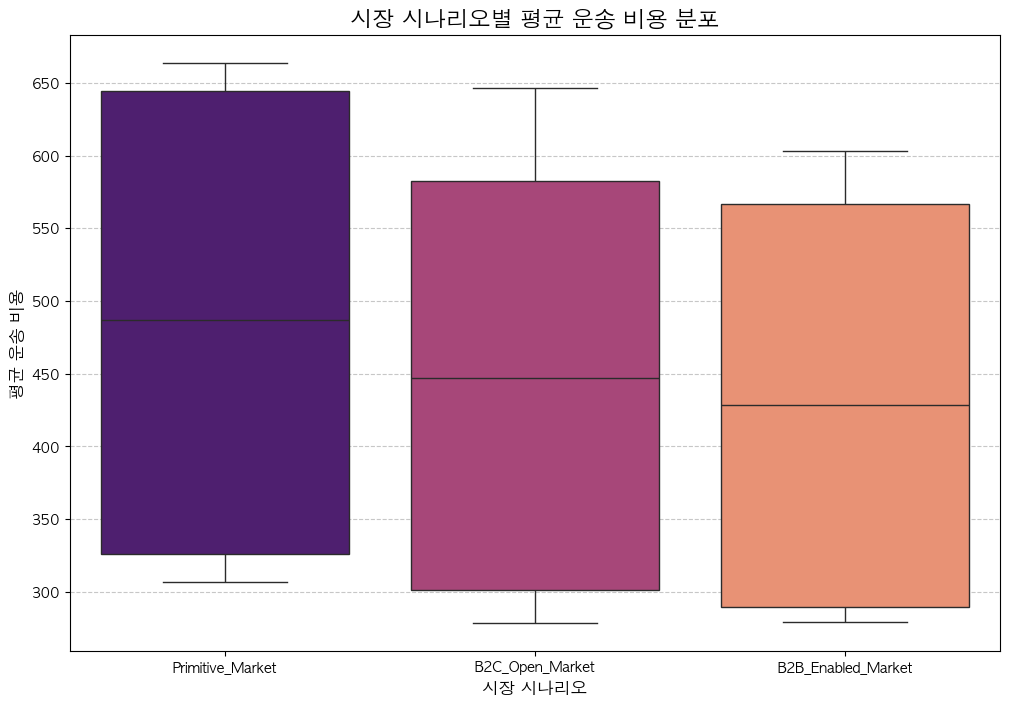


[ANOVA 검정 결과표]
                     sum_sq          df         F  PR(>F)
C(scenario)   5750399.71920     2.00000 186.15302 0.00000
Residual    166763523.21622 10797.00000       NaN     NaN
✅ ANOVA 결과표를 'anova_results_transport_cost.xlsx' 파일로 저장했습니다.


/var/folders/c6/rd6591yn02qbr593bfycd0qc0000gn/T/ipykernel_23429/3769326433.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]



[Tukey's HSD 다중 비교 결과표]
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1            group2      meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------------
B2B_Enabled_Market  B2C_Open_Market     16.8   0.0  9.9336 23.6663   True
B2B_Enabled_Market Primitive_Market  55.1367   0.0 48.2704  62.003   True
   B2C_Open_Market Primitive_Market  38.3367   0.0 31.4704 45.2031   True
-------------------------------------------------------------------------
✅ Tukey's HSD 결과표를 'tukey_hsd_results_transport_cost.xlsx' 파일로 저장했습니다.

--- 모든 분석이 종료되었습니다. ---


In [14]:
# =================================================================================
# [주 목적 3] 시장 시나리오가 평균 운송 비용에 미치는 영향 분석 (ANOVA)
# (모든 산출물을 파일로 저장하는 최종 버전)
# =================================================================================

# --- [1단계] 라이브러리 임포트 및 데이터 로딩 ---
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# (데이터 로딩 및 폰트 설정 부분은 이전과 동일)
pickle_filename = 'final10_real.pkl'
try:
    with open(pickle_filename, 'rb') as file:
        df = pickle.load(file)
except FileNotFoundError:
    exit()
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


# --- [2단계] 데이터 탐색 및 시각화 (EDA) ---
plt.figure(figsize=(12, 8))
sns.boxplot(x='시나리오', y='평균 운송 비용', data=df, palette='magma')
plt.title('시장 시나리오별 평균 운송 비용 분포', fontsize=16)
plt.xlabel('시장 시나리오', fontsize=12)
plt.ylabel('평균 운송 비용', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# --- [추가 기능 3] 박스 플롯을 PNG 파일로 저장 ---
boxplot_filename = 'boxplot_transport_cost_by_scenario.png'
plt.savefig(boxplot_filename, dpi=300, bbox_inches='tight')
print(f"✅ 박스 플롯을 '{boxplot_filename}' 파일로 저장했습니다.")

plt.show()


# --- [3단계] ANOVA 가설 검정 ---
df.rename(columns={'평균 운송 비용': 'avg_transport_cost', '시나리오': 'scenario'}, inplace=True)
model = ols('avg_transport_cost ~ C(scenario)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
pd.options.display.float_format = '{:.5f}'.format
print("\n[ANOVA 검정 결과표]")
print(anova_table)

# --- [추가 기능 1] ANOVA 결과표를 엑셀 파일로 저장 ---
excel_filename_anova = 'anova_results_transport_cost.xlsx'
anova_table.to_excel(excel_filename_anova)
print(f"✅ ANOVA 결과표를 '{excel_filename_anova}' 파일로 저장했습니다.")

# p-값을 추출하여 다음 단계에서 사용합니다.
p_value = anova_table['PR(>F)'][0]


# --- [4단계] 사후 분석 (Post-hoc Analysis) ---
if p_value < 0.05:
    tukey_result = pairwise_tukeyhsd(endog=df['avg_transport_cost'], groups=df['scenario'], alpha=0.05)
    
    print("\n[Tukey's HSD 다중 비교 결과표]")
    print(tukey_result)

    # --- [추가 기능 2] Tukey's HSD 결과표를 엑셀 파일로 저장 ---
    # Tukey 결과 객체를 pandas DataFrame으로 변환합니다.
    df_tukey = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
    excel_filename_tukey = 'tukey_hsd_results_transport_cost.xlsx'
    df_tukey.to_excel(excel_filename_tukey, index=False)
    print(f"✅ Tukey's HSD 결과표를 '{excel_filename_tukey}' 파일로 저장했습니다.")

print("\n--- 모든 분석이 종료되었습니다. ---")